In [1]:
import os
from langchain_groq import ChatGroq
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage, AIMessage
from langgraph.graph import StateGraph,MessagesState,START,END
from langgraph.prebuilt import ToolNode

In [ ]:
os.getenv('GROQ_API_KEY')

'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'

In [3]:
model = 'deepseek-r1-distill-llama-70b'

In [4]:
from langchain_groq import ChatGroq

In [5]:
llm = ChatGroq(model_name=model)

In [6]:
llm.invoke('hi')

AIMessage(content='<think>\n\n</think>\n\nHello! How can I assist you today? 😊', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 4, 'total_tokens': 20, 'completion_time': 0.080155637, 'prompt_time': 6.1809e-05, 'queue_time': 0.200928454, 'total_time': 0.080217446}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--3b794245-624c-40e1-ada5-4d3aff35ca2d-0', usage_metadata={'input_tokens': 4, 'output_tokens': 16, 'total_tokens': 20})

In [7]:
def call_model(state:MessagesState):
    question = state['messages']
    print(f'this is my current message: {question}')
    response = llm.invoke(question)
    return {'messages':[response]}

In [8]:
state={'messages': ['hi how are you?']}

In [9]:
call_model(state)

this is my current message: ['hi how are you?']


{'messages': [AIMessage(content="<think>\n\n</think>\n\nHi! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are *you* doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 8, 'total_tokens': 52, 'completion_time': 0.168184347, 'prompt_time': 0.000159288, 'queue_time': 0.200983913, 'total_time': 0.168343635}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--fc9492e3-42bb-48c8-a327-5e9801be7729-0', usage_metadata={'input_tokens': 8, 'output_tokens': 44, 'total_tokens': 52})]}

In [10]:
workflow = StateGraph(MessagesState)

In [11]:
workflow.add_node('MyBot', call_model)

In [12]:
workflow.add_edge(START, 'MyBot')

In [13]:
workflow.add_edge('MyBot', END)

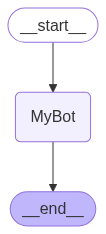

In [14]:
workflow.compile()

In [15]:
app = workflow.compile()

In [16]:
input = {'messages':['hi how are you?']}

In [17]:
app.invoke(input)

this is my current message: [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='2c4175d8-55fc-4a09-be08-580f6e60429b')]


{'messages': [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='2c4175d8-55fc-4a09-be08-580f6e60429b'),
  AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 8, 'total_tokens': 50, 'completion_time': 0.167981939, 'prompt_time': 0.000333936, 'queue_time': 0.20892882399999999, 'total_time': 0.168315875}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--06d5c01c-4f7c-4967-bd6b-6012bb5c43fb-0', usage_metadata={'input_tokens': 8, 'output_tokens': 42, 'total_tokens': 50})]}

In [18]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"Output from {key} Node")
        print("_______")
        print(value)
        print("\n")

this is my current message: [HumanMessage(content='hi how are you?', additional_kwargs={}, response_metadata={}, id='2de858cc-ddb4-4116-a269-84d500fa50f7')]
Output from MyBot Node
_______
{'messages': [AIMessage(content="<think>\n\n</think>\n\nHello! I'm just a virtual assistant, so I don't have feelings, but I'm here and ready to help you with whatever you need. How are you doing? 😊", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 42, 'prompt_tokens': 8, 'total_tokens': 50, 'completion_time': 0.160916896, 'prompt_time': 0.000162308, 'queue_time': 0.201071736, 'total_time': 0.161079204}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--f213c139-d2e3-41c3-8816-43228189e299-0', usage_metadata={'input_tokens': 8, 'output_tokens': 42, 'total_tokens': 50})]}




In [19]:
@tool
def search(query:str):
    '''this is my custom tool for search weather information'''
    if 'delhi' in query.lower():
        return 'the temp is 45 degree and sunny'
    else:
        return 'the temp is 25 degree and cloudy'

In [20]:
search.invoke('what is the temperature in Delhi?')

'the temp is 45 degree and sunny'

In [21]:
search

StructuredTool(name='search', description='this is my custom tool for search weather information', args_schema=<class 'langchain_core.utils.pydantic.search'>, func=<function search at 0x00000197B94BECA0>)

In [22]:
tools = [search]

In [23]:
llm_with_tool = llm.bind_tools(tools)

In [24]:
response = llm_with_tool.invoke('What is the weather in Delhi?')

In [25]:
response

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'bgq15gg31', 'function': {'arguments': '{"query":"Delhi weather"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 196, 'prompt_tokens': 132, 'total_tokens': 328, 'completion_time': 0.875928992, 'prompt_time': 0.008441357, 'queue_time': 0.201041167, 'total_time': 0.884370349}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--8b5c943d-1dd0-4e06-8d98-e67db2285b01-0', tool_calls=[{'name': 'search', 'args': {'query': 'Delhi weather'}, 'id': 'bgq15gg31', 'type': 'tool_call'}], usage_metadata={'input_tokens': 132, 'output_tokens': 196, 'total_tokens': 328})

In [26]:
response.tool_calls

[{'name': 'search',
  'args': {'query': 'Delhi weather'},
  'id': 'bgq15gg31',
  'type': 'tool_call'}]

In [27]:
response.content

''

In [28]:
def call_model(state:MessagesState):
    question=state['messages']
    response = llm_with_tool.invoke(question)
    return {'messages':[response]}

In [29]:
input={'messages':['What is the temperature in Delhi?']}

In [30]:
call_model(input)

{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'cw9jw2yey', 'function': {'arguments': '{"query":"Delhi temperature"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 83, 'prompt_tokens': 132, 'total_tokens': 215, 'completion_time': 0.393128996, 'prompt_time': 0.008468035, 'queue_time': 0.20108248999999997, 'total_time': 0.401597031}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--ce2d0700-c025-403f-b921-126845d38dfb-0', tool_calls=[{'name': 'search', 'args': {'query': 'Delhi temperature'}, 'id': 'cw9jw2yey', 'type': 'tool_call'}], usage_metadata={'input_tokens': 132, 'output_tokens': 83, 'total_tokens': 215})]}

In [31]:
def router_function(state:MessagesState):
    message=state['messages']
    last_message = message[-1]
    if last_message.tool_calls:
        return 'tools'
    return END

In [32]:
workflow2 = StateGraph(MessagesState)

In [33]:
workflow2.add_node('llmWithTool', call_model)

In [34]:
tool_node = ToolNode(tools)

In [35]:
workflow2.add_node('mytools', tool_node)

In [36]:
workflow2.add_edge(START, 'llmWithTool')

In [37]:
workflow2.add_conditional_edges('llmWithTool',
                                router_function, 
                                {'tools': 'mytools', END:END})

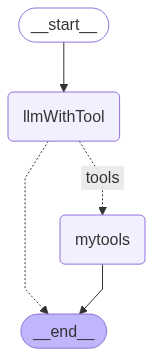

In [38]:
workflow2.compile()

In [39]:
app = workflow2.compile()

In [40]:
app.invoke({'messages':['what is the weather in Bangaluru?']})

{'messages': [HumanMessage(content='what is the weather in Bangaluru?', additional_kwargs={}, response_metadata={}, id='2b54e055-440b-42bd-aa81-002069189fe2'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'n9m9kwjwf', 'function': {'arguments': '{"query":"Bangalore weather"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 195, 'prompt_tokens': 134, 'total_tokens': 329, 'completion_time': 0.913934851, 'prompt_time': 0.014960857, 'queue_time': 0.201065519, 'total_time': 0.928895708}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--3a38b660-e0fc-451b-8ed8-d780bae775b2-0', tool_calls=[{'name': 'search', 'args': {'query': 'Bangalore weather'}, 'id': 'n9m9kwjwf', 'type': 'tool_call'}], usage_metadata={'input_tokens': 134, 'output_tokens': 195, 'total_tokens': 329}),
  ToolMessage(content='the temp is 25 degree and cloudy', nam

In [41]:
app.invoke({'messages':['what is ai?']})

{'messages': [HumanMessage(content='what is ai?', additional_kwargs={}, response_metadata={}, id='0b9aea24-f31a-4971-9961-5a64cff807d3'),
  AIMessage(content='Artificial Intelligence (AI) refers to the simulation of human intelligence in machines that are programmed to think and learn like humans. It encompasses various technologies like machine learning, natural language processing, and robotics. AI systems can perform tasks such as problem-solving, decision-making, speech recognition, and more. If you have specific questions about AI or its applications, feel free to ask!', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 326, 'prompt_tokens': 129, 'total_tokens': 455, 'completion_time': 1.4004559859999999, 'prompt_time': 0.014738679, 'queue_time': 0.201234165, 'total_time': 1.415194665}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--90749a85-43d4-492e-a654-4fc044

In [42]:
workflow2.add_edge("mytools", 'llmWithTool')

Adding an edge to a graph that has already been compiled. This will not be reflected in the compiled graph.


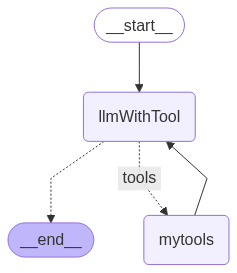

In [44]:
workflow2.compile()

In [45]:
app3 = workflow2.compile()

In [49]:
for op in app3.stream({"messages":["Temperature in New Delhi?"]}):
    for key,value in op.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llmWithTool
_______
{'messages': [AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '0mrr8ffdr', 'function': {'arguments': '{"query":"temperature in New Delhi"}', 'name': 'search'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 170, 'prompt_tokens': 130, 'total_tokens': 300, 'completion_time': 0.738534184, 'prompt_time': 0.01474911, 'queue_time': 0.235065112, 'total_time': 0.753283294}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a7569652-3dca-4bae-88d4-ddaa710c03ba-0', tool_calls=[{'name': 'search', 'args': {'query': 'temperature in New Delhi'}, 'id': '0mrr8ffdr', 'type': 'tool_call'}], usage_metadata={'input_tokens': 130, 'output_tokens': 170, 'total_tokens': 300})]}


here is output from mytools
_______
{'messages': [ToolMessage(content='the temp is 45 degree and sunny', name='search', id='45efeff8-d1d7-4574-8d28-193d7

In [50]:
from langgraph.checkpoint.memory import MemorySaver

In [51]:
memory = MemorySaver()

In [52]:
app4 = workflow2.compile(checkpointer=memory)

In [53]:
config = {"configurable": {"thread_id": "1"}}

In [55]:
events=app4.stream(
    {"messages":["How is the weather in new delhi?"]},config=config,stream_mode="values"
    )

In [56]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

How is the weather in new delhi?
================================== Ai Message ==================================
Tool Calls:
  search (6e9x06twh)
 Call ID: 6e9x06twh
  Args:
    query: new delhi
================================= Tool Message =================================
Name: search

the temp is 45 degree and sunny
================================== Ai Message ==================================

The weather in New Delhi is currently 45 degrees and sunny. Stay hydrated and take care in the heat! Let me know if you need more details or assistance.


In [61]:
events=app4.stream(
    {"messages":["how is the weather in indore?"]},config=config,stream_mode="values"
    )

In [62]:
for event in events:
    event["messages"][-1].pretty_print()

================================ Human Message =================================

how is the weather in indore?
================================== Ai Message ==================================
Tool Calls:
  search (4hpsjyzs4)
 Call ID: 4hpsjyzs4
  Args:
    query: indore
================================= Tool Message =================================
Name: search

the temp is 25 degree and cloudy
================================== Ai Message ==================================

The weather in Indore is currently 25 degrees and cloudy. Consider wearing light layers or carrying an umbrella if you're planning to go out. Let me know if you need more details!


In [63]:
memory.get(config)

{'v': 3,
 'ts': '2025-06-22T01:48:11.647129+00:00',
 'id': '1f04f0af-45cb-6f5e-800f-c81ab86ab456',
 'channel_versions': {'__start__': '00000000000000000000000000000014.0.8152010394250706',
  'messages': '00000000000000000000000000000017.0.25924613122217477',
  'branch:to:llmWithTool': '00000000000000000000000000000017.0.46557750705930345',
  'branch:to:mytools': '00000000000000000000000000000016.0.8095804729358312'},
 'versions_seen': {'__input__': {},
  '__start__': {'__start__': '00000000000000000000000000000013.0.824811498619158'},
  'llmWithTool': {'branch:to:llmWithTool': '00000000000000000000000000000016.0.0228128693002424'},
  'mytools': {'branch:to:mytools': '00000000000000000000000000000015.0.020743842826497216'}},
 'channel_values': {'messages': [HumanMessage(content='How is the weather in new delhi?', additional_kwargs={}, response_metadata={}, id='5053c5c0-494b-47ea-b4b5-d6354b20e9b2'),
   AIMessage(content='', additional_kwargs={'tool_calls': [{'id': '6e9x06twh', 'function